<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_29_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 29:  Barplots & Catplots, regplot(),heatmap(),pairplot(),correlation coefficient,joinplot()

### Activity 1: Loading modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Activity 2 : Bar plots using tips dataset

Create a Pandas DataFrame using the below link which has the dataset of Tips taken on the total bill amount in restaurants in the CSV format:

**Dataset Link** : https://raw.githubusercontent.com/narayanan225/datasets/main/tips.csv



In [ ]:
#Activity
tips_df = pd.read_csv('https://raw.githubusercontent.com/narayanan225/datasets/main/tips.csv')
# Print the first 5 rows in the DataFrame
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips_df["sex"].value_counts()

,count
sex,
Male,157
Female,87


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
tips_df.shape

(244, 7)

In [ ]:
tips_df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Activity 3: Create Sub DataFrames

Create two separate DataFrames for Male and Female such that one DataFrame holds the information only of Male while the other DataFrame holds the information only of Female.

In [ ]:
# Create two separate DataFrames for Male and Female using groupby()
gender_df = tips_df.groupby(by="sex")
gender_df


In [ ]:
male_df = gender_df.get_group("Male")
female_df = gender_df.get_group("Female")

In [ ]:
male_df.shape

(157, 7)

In [ ]:
female_df.shape

(87, 7)

---

### Activity 4: Create Bivariate Barplots

**Univariate, Bivariate, and Multivariate Analysis:**

**Univariate Analysis:**

Univariate analysis involves examining and describing a single variable in a dataset. The primary aim is to understand the distribution, central tendency, and spread of values. Common techniques include histograms, box plots, and descriptive statistics (mean, median, mode).

**Bivariate Analysis:**

Bivariate analysis involves examining the relationship between two variables. It helps to understand how one variable changes with respect to another and can reveal correlations or associations. Common techniques include scatter plots, bar plots (with hue), and correlation coefficients.

**Multivariate Analysis:**

Multivariate analysis involves examining the relationships between three or more variables. This type of analysis can uncover more complex interactions and patterns in the data. Common techniques include multiple regression, multivariate ANOVA, and using visualizations like pair plots and heatmaps.

Create a bivariate bar plot to visualise the tips given by Male.

In [ ]:
male_df.head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


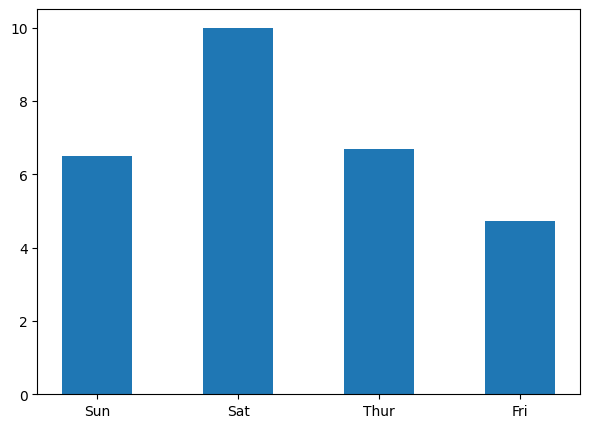

In [ ]:
# Create a bivariate bar plot to visualise the tips given by Male to know which day of the week has lowest tips

plt.figure(figsize=(7,5))
plt.bar(x=male_df["day"],height=male_df["tip"], width = 0.5)
plt.show()


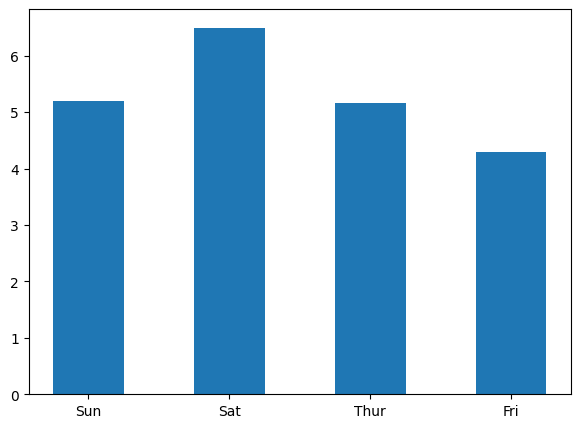

In [ ]:
# Create a bivariate bar plot to visualise the tips given by Female.
plt.figure(figsize=(7,5))
plt.bar(x=female_df["day"],height=female_df["tip"], width = 0.5)
plt.show()


Create a bar plot for both the Male and Female DataFrames to compare the tip variation. Make sure you enable legends to differentiate between the bars for Male and Female.

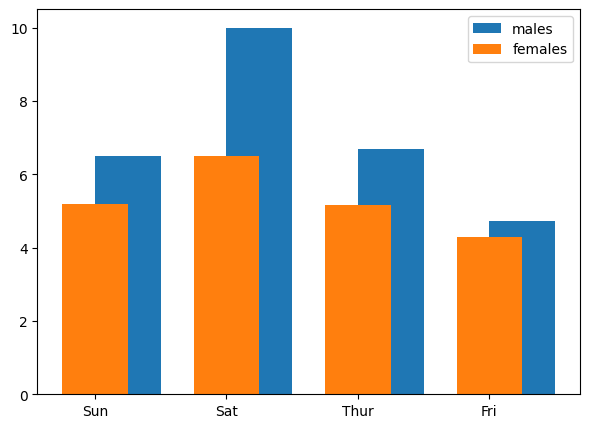

In [ ]:
# Create a bar plot for both the DataFrames to compare the tip variation in Male and Female.
plt.figure(figsize=(7,5))
plt.bar(x=male_df["day"],height=male_df["tip"], width = 0.5,label="males",align="edge")
plt.bar(x=female_df["day"],height=female_df["tip"], width = 0.5,label="females")
plt.legend()
plt.show()

In [ ]:
tips_df["day"].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
tips_df.groupby(["day"])["sex"].value_counts()

day   sex   
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Thur  Female    32
      Male      30
Name: count, dtype: int64

In [ ]:
total_bill_by_day_gender = tips_df.groupby(['day','sex']).sum()
total_bill_by_day_gender

total_bill     tip  \
day  sex                          
Fri  Female      127.31   25.03   
     Male        198.57   26.93   
Sat  Female      551.05   78.45   
     Male       1227.35  181.95   
Sun  Female      357.70   60.61   
     Male       1269.46  186.78   
Thur Female      534.89   82.42   
     Male        561.44   89.41   

                                                        smoker  \
day  sex                                                         
Fri  Female                          YesYesNoYesYesYesNoYesYes   
     Male                         YesNoYesYesYesYesNoYesYesYes   
Sat  Female  NoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoYesNoYesY...   
     Male    NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYes...   
Sun  Female           NoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYes   
     Male    NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...   
Thur Female  NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...   
     Male    NoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoN...   

                                                          time  size  
day  sex                                                              
Fri  Female  DinnerDinnerDinnerDinnerDinnerLunchLunchLunchL...    19  
     Male    DinnerDinnerDinnerDinnerDinnerDinnerDinnerLunc...    21  
Sat  Female  DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...    63  
     Male    DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...   156  
Sun  Female  DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...    53  
     Male    DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...   163  
Thur Female  LunchLunchLunchLunchLunchLunchLunchLunchLunchL...    79  
     Male    LunchLunchLunchLunchLunchLunchLunchLunchLunchL...    73

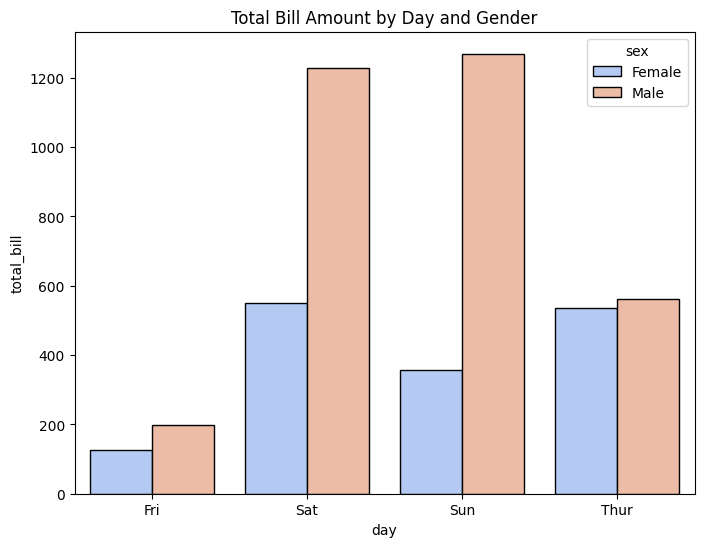

In [ ]:
# Use Group by function
import seaborn as sns
plt.figure(figsize=(8,6))
total_bill_by_day_gender = tips_df.groupby(['day','sex'])['total_bill'].sum().reset_index()

sns.barplot(x='day',y='total_bill',hue='sex',
            data=total_bill_by_day_gender,
            palette='coolwarm',edgecolor='black')
plt.title("Total Bill Amount by Day and Gender")
plt.show()

In [ ]:
smoker_counts = tips_df['smoker'].value_counts()
smoker_counts

,count
smoker,
No,151
Yes,93


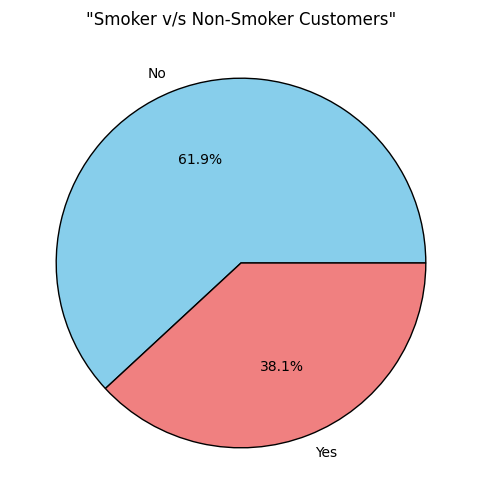

In [ ]:
# Smoker Counts using pie chart
smoker_counts = tips_df['smoker'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(smoker_counts,labels=smoker_counts.index,autopct= '%1.1f%%',colors=['skyblue','lightcoral'],wedgeprops={'edgecolor':'black'})# pie chart
plt.title('"Smoker v/s Non-Smoker Customers"')
plt.axis('on')

plt.show()

In [ ]:
tips_df["time"].value_counts()

,count
time,
Dinner,176
Lunch,68


### Activity 5: The `catplot()` function

A catplot (categorical plot) is a type of plot provided by the seaborn library in Python, which is specifically designed for visualizing categorical data.

catplot can be used to generate several different types of categorical plots.  It is a powerful and flexible function that allows for easy generation of complex categorical plots with multiple options for customization.

**Types of Categorical Plots**

seaborn.catplot can generate several types of plots, including:

1. **Strip Plot (strip):** A scatter plot where one of the variables is categorical.
2.**Swarm Plot (swarm):** Similar to a strip plot but the points are adjusted (or swarmed) so that they do not overlap.
3. **Box Plot (box):** Displays the distribution of data based on a five-number summary (minimum, first quartile, median, third quartile, and maximum).
4. **Violin Plot (violin):** Similar to a box plot but shows the density of the data at different values.
5. **Boxen Plot (boxen):** An enhanced box plot for larger datasets that provides more detail about the distribution.
6. **Point Plot (point):** Shows the point estimates and confidence intervals using markers.
7. **Bar Plot (bar):** Shows the mean (or other estimator) of a categorical variable with error bars.
8. **Count Plot (count):** Shows the count of observations in each categorical bin using bars.

In [ ]:
#Activity
tips_df = pd.read_csv('https://raw.githubusercontent.com/narayanan225/datasets/main/tips.csv')
# Print the first 5 rows in the DataFrame
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


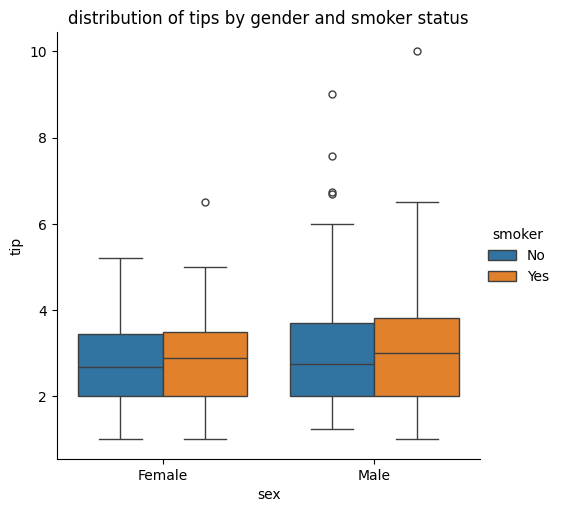

In [ ]:
#Activity create a catplot with kind ="box"
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="sex",y="tip",data=tips_df,kind="box",hue="smoker")
plt.title("distribution of tips by gender and smoker status")
plt.show()



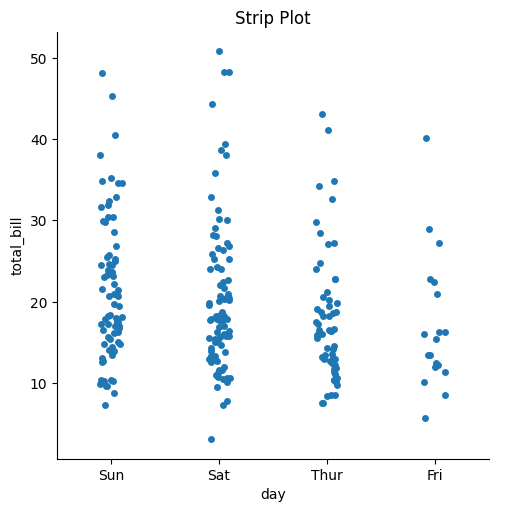

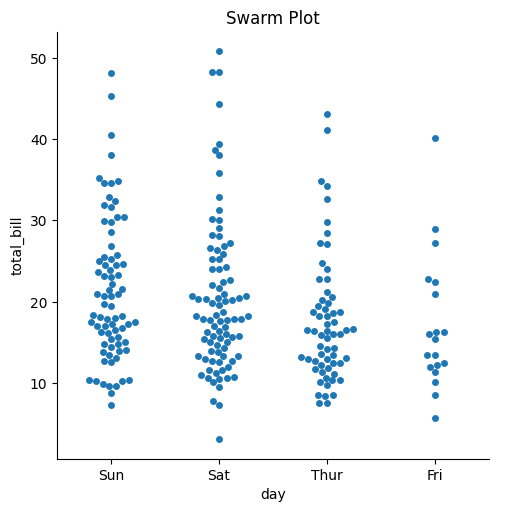

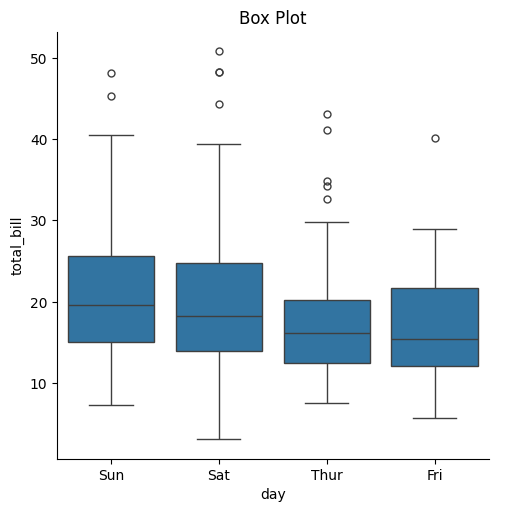

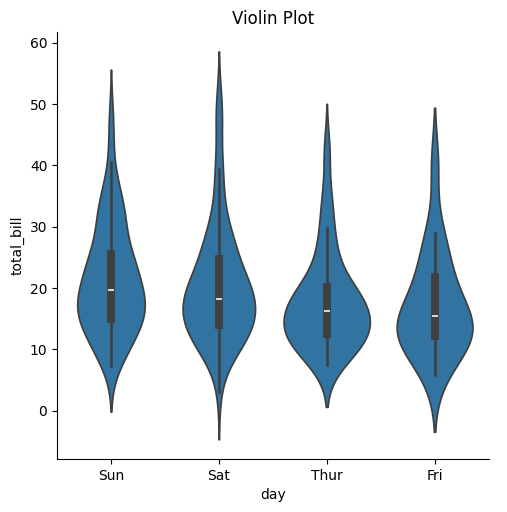

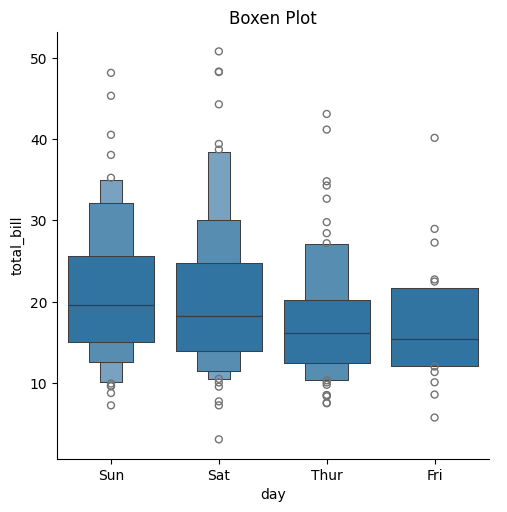

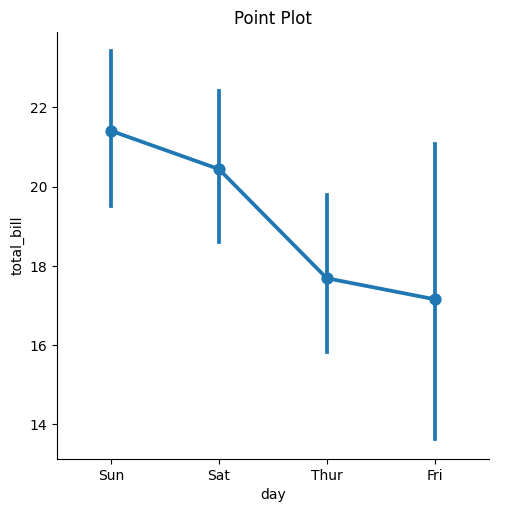

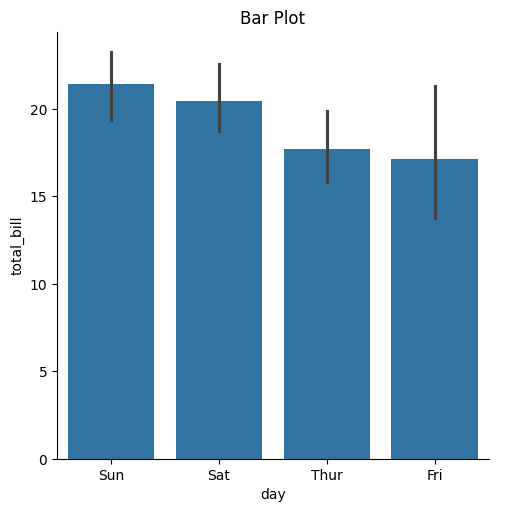

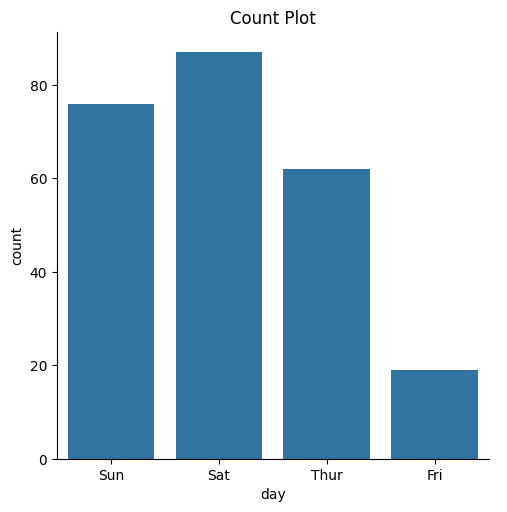

In [ ]:
# Activity with different plots

# Strip Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='strip')
plt.title('Strip Plot')
plt.show()

# Swarm Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='swarm')
plt.title('Swarm Plot')
plt.show()

# Box Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='box')
plt.title('Box Plot')
plt.show()

# Violin Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='violin')
plt.title('Violin Plot')
plt.show()

# Boxen Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='boxen')
plt.title('Boxen Plot')
plt.show()

# Point Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='point')
plt.title('Point Plot')
plt.show()

# Bar Plot
sns.catplot(x='day', y='total_bill', data=tips_df, kind='bar')
plt.title('Bar Plot')
plt.show()

# Count Plot
sns.catplot(x='day', data=tips_df, kind='count')
plt.title('Count Plot')
plt.show()

In [ ]:
sns.catplot(x='day', y='total_bill', data=tips_df, kind='box')
plt.title('Box Plot of Total Bill for Each Day of the Week')
plt.show()

sns.catplot(x='day', y='total_bill', data=tips_df, kind='violin')
plt.title('Violin Plot of Total Bill for Each Day of the Week')
plt.show()

### Activity 6: Correlation

**Correlation** is a statistical measure that describes the degree to which two variables move in relation to each other. It helps us understand and quantify the relationship between two sets of values. By knowing the correlation between two variables, we can make informed guesses about how changes in one variable might affect the other.

**Correlation values range between -1 and 1:**

- `+1` indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases.
- `-1` indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases.
- `0` indicates no correlation, meaning that the variables do not have any linear relationship.

To understand correlation, you first need to understand the concept of slope. The slope of a line is defined as the tangent of the angle it makes with the x-axis in the counter-clockwise direction.

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import the required modules and load the time-series dataset on air quality
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

air_df=pd.read_csv("/content/drive/MyDrive/datasets/AirQualityUCI.csv", sep=";")
air_df.head()

# Removing the 'Unnamed: 15' & 'Unnamed: 16' columns.
air_df = air_df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Removing the null values.
air_df = air_df.dropna()

# Creating a Pandas series containing 'datetime' objects.
time = []
for i in air_df["Time"]:
    time.append(i.replace(".",":"))

time_s = pd.Series(time)
time_s

date_time = air_df["Date"] + " " + time_s

#Convert to datetime values
date_time = pd.to_datetime(date_time, format="%d/%m/%Y %H:%M:%S")


# Remove the Date & Time columns from the DataFrame and add the 'date_time' series in it.
air_df = air_df.drop(columns=['Date', 'Time'], axis=1)
air_df.insert(loc=0, column='DateTime', value=date_time)

# Get the Pandas series containing the year values as integers.
year_series = date_time.dt.year

# Get the Pandas series containing the month values as integers.
month_series = date_time.dt.month

# Get the Pandas series containing the day values as integers.
day_series = date_time.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
#day_name_series = date_time.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
air_df['Year'] = year_series
air_df['Month'] = month_series
air_df['Day'] = day_series


# Sort the DataFrame by the 'DateTime' values in the ascending order.
air_df = air_df.sort_values(by='DateTime')


# Create a function to replace the commas with periods in a Pandas series.
def replace_comma(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=air_df.index)
    return new_series

# Apply the 'replace_comma()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    air_df[col] = replace_comma(air_df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
air_df = air_df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
air_2004_df = air_df.loc[air_df['Year'] == 2004, air_df.columns]
air_2005_df = air_df.loc[air_df['Year'] == 2005, air_df.columns]

# Replace the -200 value with the median values for each column
for i in air_2004_df.columns[1:-3]:
    median = air_2004_df[i].median()
    air_2004_df[i] = air_2004_df[i].replace(to_replace = -200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for i in air_2005_df.columns[1:-3]:
    median = air_2005_df[i].median()
    air_2005_df[i] = air_2005_df[i].replace(to_replace = -200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = air_2004_df.groupby(by='Month')
group_2005_month = air_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([air_2004_df, air_2005_df])

# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int32         
 11  Month          9357 non-null   int32         
 12  Day            9357 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(3)
memory usage: 913.8 KB


In [ ]:
#Define a function that creates a line plot between two series or arrays. It should take the inputs described above.

def line_plot(width,height,x_values,y_values,color,l):
    plt.figure(figsize=(width,height))
    plt.plot(x_values,y_values,color=color,label=l)
    plt.legend()
    plt.show()


Now let's create a line plot to visualise the monthly median concentration of carbon monoxide and ozone in the year 2005.

In [ ]:
group_2005_month.get_group(3)

In [ ]:
group_2005_month.median()

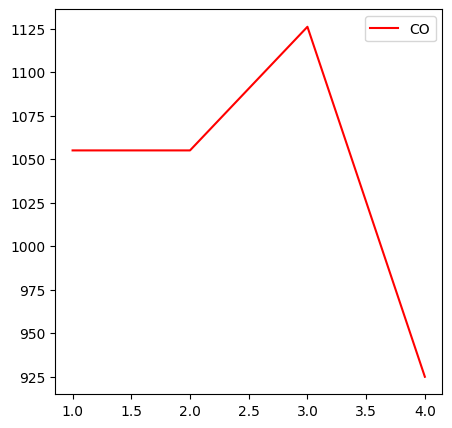

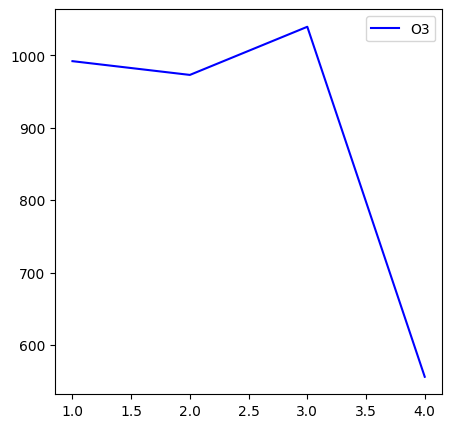

In [ ]:
# create lineplot for co and ozone for year 2005

line_plot(5,5,[1,2,3,4],group_2005_month.median()["PT08.S1(CO)"],"red","CO"	)
line_plot(5,5,[1,2,3,4],group_2005_month.median()["PT08.S5(O3)"],"blue","O3")

Let's create a scatter plot between the carbon monoxide and ozone columns to visualise the variation in their values as the values in one of the columns change.

In [ ]:
df["PT08.S1(CO)"].shape

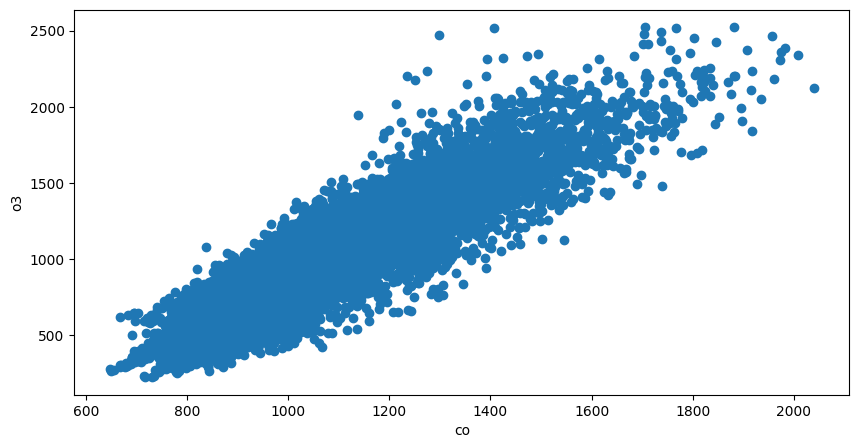

In [ ]:
# Create a scatter plot between the co and ozone
plt.figure(figsize=(10,5))
plt.scatter(df["PT08.S1(CO)"],df["PT08.S5(O3)"])
plt.xlabel("co")
plt.ylabel("o3")
plt.show()



### Activity 7:The `regplot()` Function



Imagine we can fit all the points in a scatter plot with a single straight line. This line would typically have a positive slope if the data points trend upwards. To draw such a line that best fits all the points, we use the `regplot() `function from the seaborn library.

This line, known as the regression line, represents the best fit for the data points in a scatter plot. While the line might not pass through every point, it is positioned in a way that minimizes the overall distance to all points. This concept is part of linear regression, which we'll explore in detail later. For now, just understand that the `regplot()` function helps visualize how well a linear relationship can explain the data points in your scatter plot.

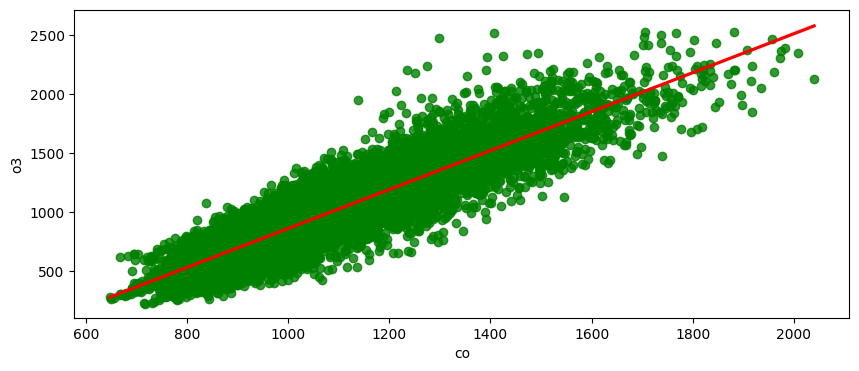

In [ ]:
# create a regression line
plt.figure(figsize=(10,4))
sns.regplot(x=df["PT08.S1(CO)"],y=df["PT08.S5(O3)"],color ="green", line_kws ={"color":"red"})

plt.xlabel("co")
plt.ylabel("o3")
plt.show()


Lets create a line plot to visualise the monthly median concentration of carbon monoxide ['PT08.S1(CO)'] and nitrogen oxides ['PT08.S3(NOx)'] in the year 2005.

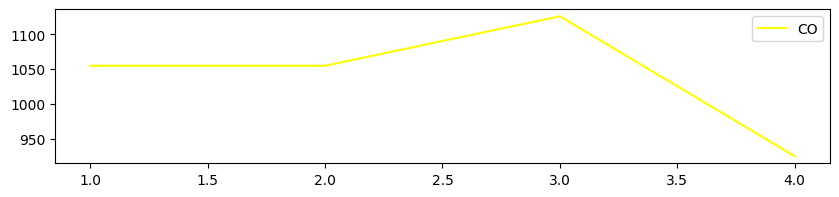

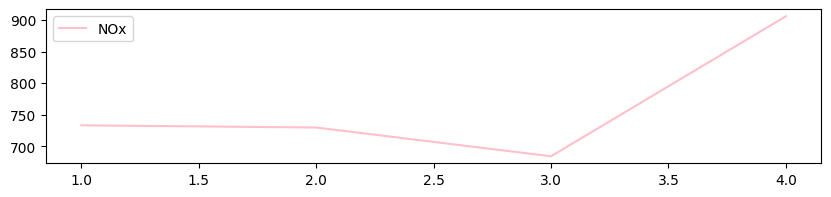

In [ ]:
#Create a line plot to visualise the monthly median concentration of carbon monoxide ['PT08.S1(CO)'] and nitrogen oxides ['PT08.S3(NOx)'] in the year 2005.
line_plot(10, 2, np.arange(1,5), group_2005_month.median()['PT08.S1(CO)'], 'yellow', 'CO' )
line_plot(10, 2, np.arange(1,5), group_2005_month.median()['PT08.S3(NOx)'], 'pink', 'NOx' )

As the lines for the carbon monoxide time series plot go up, the lines for the nitrogen oxides go down and vice-versa. The two time series graphs are almost mirror images of each other.

Now let's create a scatter plot between the two columns.

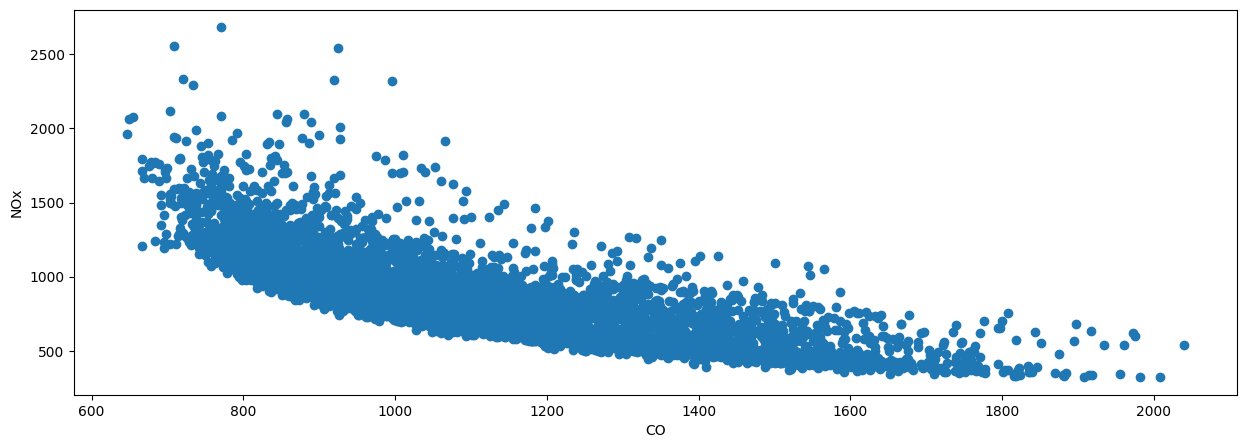

In [ ]:
# Create a scatter plot between the carbon monoxide ['PT08.S1(CO)'] and nitrogen oxides ['PT08.S3(NOx)']  columns.
plt.figure(figsize=(15,5))
plt.scatter(df['PT08.S1(CO)'], df['PT08.S3(NOx)'])
plt.xlabel('CO')
plt.ylabel('NOx')
plt.show()

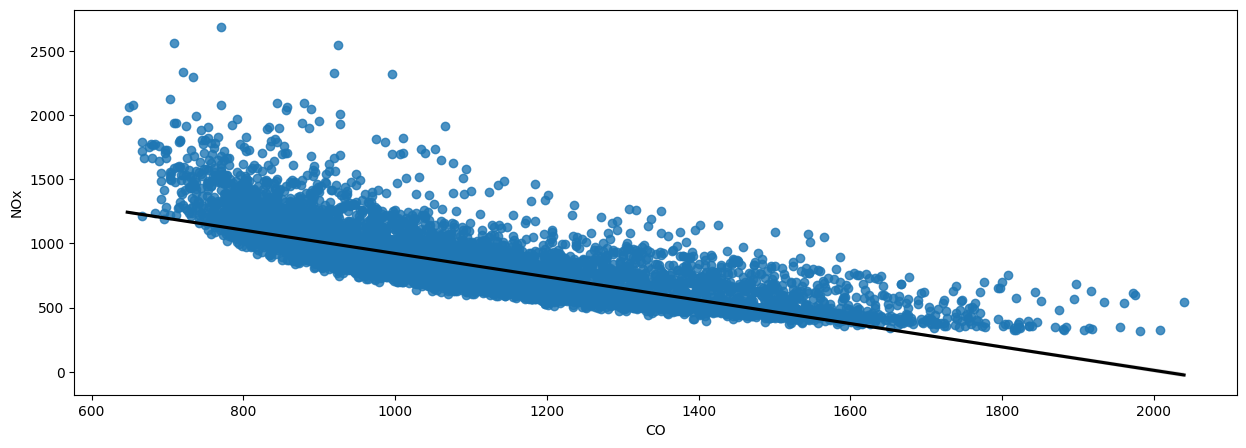

In [ ]:
# Create a regression plot for the carbon monoxide ['PT08.S1(CO)'] and nitrogen oxides ['PT08.S3(NOx)'] columns.
plt.figure(figsize=(15,5))
sns.regplot(x=df['PT08.S1(CO)'], y=df['PT08.S3(NOx)'], line_kws={'color':'black'})
plt.xlabel('CO')
plt.ylabel('NOx')
plt.show()

The linear relationship (either negative or positive) between two features or sets of values is called **correlation**. Now the question is, how do we calculate the strength of a linear relationship (or correlation). The answer is "by calculating a numeric value called correlation coefficient".

---

### Activity 8: Correlation Coefficient by The `corrcoef()` function

A correlation coefficient is a numeric values that range between $-1$ to $1$ including both. It tells us the strength (or degree) of a relationship between two sets of quantities or features. It is denoted by letter $R$.

- If $R > 0$, the two sets of values exhibit a **positive** linear relationship.

- If $R = 0$, the two sets of values exhibit a **no** linear relationship.

- If $R < 0$, the two sets of values exhibit a **negative** linear relationship.

To calculate the value of the correlation coefficient between two sets of values, use the `corrcoef()` function of the `numpy` module.

**Syntax:** `np.corrcoef(array1, array2)` where `np` denotes alias for the `numpy` module and `array1` & `array2` are the two sets of values for which the correlation coefficient value needs to be calculated.

The `corrcoef()` function returns a two-dimensional array.

- The first row & first column contains the correlation coefficient (or $R$) value for the correlation between `array1` and `array1` which will always be 1.

- The first row & second column contains the $R$ value for the correlation between `array1` and `array2` .

- The second row & first column contains the $R$ value for the correlation between `array2` and `array1`.

- The second row & second column contains the $R$ value for the correlation between `array2` and `array2` which will always be 1.

Let's calculate the correlation coefficient for the carbon monoxide & ozone columns.

In [ ]:
# Calculate the correlation coefficient for the carbon monoxide ['PT08.S1(CO)'] & ozone ['PT08.S5(O3)'] columns.
import numpy as np
np.corrcoef(df['PT08.S1(CO)'],df['PT08.S5(O3)'])[0,1]



In [ ]:
#Calculate the correlation coefficient for the correlation between carbon monoxide & nitrogen oxides columns.

np.corrcoef(df['PT08.S1(CO)'],df['PT08.S3(NOx)'])[0,1]

### Activity 9: The `corr()` Function

When you need to compute the correlation coefficients between every pair of numeric columns in a DataFrame, you can utilize the `corr()` function provided by the `pandas` library.

 This function generates a correlation matrix, which is an N-dimensional DataFrame containing the correlation coefficient values for all pairs of numeric columns.



In [ ]:
df.columns[1:-3]

In [ ]:
#  Calculate the R value between all the air pollutants, temperature, relative & absolute humidity columns in the 'df' DataFrame.
df1 = df.iloc[:,1:-3].corr()
df1



### Activity 10: The `heatmap()` Function

To visually identify columns with high correlation, you can create a heatmap using the `heatmap()` function from the seaborn library.

This function accepts a DataFrame of correlation coefficient values as input and produces an N-dimensional heatmap where each cell is represented by varying color intensities.

In [ ]:
df4 ={"A":[1,2,3,4],
      "B":[8,9,np.nan,9]}
df4_ = pd.DataFrame(df4)
df4_

In [ ]:
sns.heatmap(df4_,annot=True)
plt.show()

In [ ]:
# Create a heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation.
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df1,annot=True)
plt.show()



You can change the colour scheme of a heatmap by specifying another colour scheme using the `cmap` parameter.

In [ ]:
# \Change the colour scheme of the cells of the above heatmap using cmap
plt.figure(figsize=(15,5))
sns.heatmap(df1, annot= True, cmap='YlGnBu' )
plt.show()

Using a heatmap makes it easier to quickly identify which columns have strong relationships with each other, aiding in data exploration and analysis.




### Activity 11: The `pairplot()` Function

You can also create a scatter plot between all the features (taking two features at a time) in one go by using the `pairplot()` function of the `seaborn` module. It takes the DataFrame containing numeric values and returns all the scatter plots in the form of an $N$-dimensional array for all the possible combinations of the features (taking two features at a time).



**Note:** The `pairplot()` function is a computationally heavy function so it may take some time to return the required scatter plots.

In [ ]:
# Create a sample DataFrame
data = {
    'Column1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Column2': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Column3': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
}

sample_df = pd.DataFrame(data)

# Create a pairplot
sns.pairplot(sample_df)
plt.show()

In this example, the `pairplot()` function generates a grid of plots. Each subplot shows the scatter plot for a pair of columns, and the diagonal subplots show the distribution of each column.

In [ ]:
# Create a sample DataFrame with a categorical variable
data = {
    'Column1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Column2': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Column3': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}

sample_df2 = pd.DataFrame(data)

# Create a pairplot with a hue
sns.pairplot(sample_df2, hue='Category')
plt.show()

In this example, the hue parameter is set to the Category column. This adds different colors for each category in the scatter plots, helping to see how the categorical variable influences the relationships between numeric variables.

Using the `pairplot()` function is an efficient way to explore your data and uncover patterns and correlations among multiple variables at once.

In [ ]:
# Create the scatter plots for the numeric columns of the 'df' DataFrame in one go.
sns.pairplot(df.iloc[:, 1:-3])

Look at the scatter plot between NMHC (Non-Methane Hydrocarbons) and $\text{C}_6 \text{H}_6$ (Benzene). They have a perfectly smooth curve which tells us that as the concentration of NMHC increases, the concentration of benzene also increases. This makes a lot of sense because benzene is a non-methane hydrocarbon. It does not contain a methane group either in its structure.

---

### Activity 12: Important Points On Correlation

The correlation coefficient is a measure used to determine the strength and direction of a linear relationship between two variables. However, it is crucial to note that correlation does not imply causation. This means that even if two variables have a perfect linear relationship, it does not mean that changes in one variable cause changes in the other. The linear relationship could merely be coincidental.

**Key Points About Correlation Coefficient**

1. Correlation is not Causation: A high correlation between two variables does not mean that one causes the other to change. The relationship might be due to an external factor or pure chance.

2. Significance with Large Datasets: The correlation coefficient is more meaningful with large datasets, preferably with thousands of data points. With fewer data points, the correlation might be misleading. For example, two points will always form a straight line, giving a perfect correlation of 1 or -1, which is not significant.


3. Making Predictions: The correlation coefficient can be useful for making predictions or best guesses. For instance, if there is a high correlation between carbon monoxide levels and nitrogen oxide levels, knowing the carbon monoxide level can help estimate the nitrogen oxide level within a certain range.

4. Strength of correlation in most of the cases

   - If $R \ge 0.7$ or $R \le -0.7$, then there is a strong correlation.

   - If $0.5 \le R < 0.7$ or $-0.7 < R \le -0.5$, then there is a moderate correlation.

   - In other cases, there is a weak correlation.
   
These ranges are guidelines and can be adjusted based on the specific context or problem being addressed.

5. Linear Relationships: The correlation coefficient only measures linear relationships. Non-linear relationships, no matter how strong, will not be adequately captured by the correlation coefficient.

6. Interpreting Correlation Coefficient:

  - Positive Correlation: As one variable increases, the other variable also increases.
  - Negative Correlation: As one variable increases, the other variable decreases.
  - Zero Correlation: No linear relationship between the variables.
7. Outliers and Correlation: Outliers can significantly affect the correlation coefficient, making it either much higher or lower than it should be. It's essential to consider outliers when interpreting correlation.

In [ ]:
# Sample DataFrame
data = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

df_sample = pd.DataFrame(data)

# Calculate correlation coefficient
correlation_matrix = df.corr()
print(correlation_matrix)

---

### Activity 13:  Scatter Plots from seaborn module

You can also use the `scatterplot()` function of the `seaborn` module to create a scatter plot.



In [ ]:
# Create a scatter plot between the co and ozone
plt.figure(figsize=(5,5))
sns.scatterplot(x='PT08.S1(CO)', y ='PT08.S5(O3)' ,data=df)
plt.xlabel('CO')
plt.ylabel('O3')
plt.show()

In [ ]:
df.columns

In [ ]:
#  Create a scatter plot between the temperature and absolute humidity columns
plt.figure(figsize=(15, 5))
sns.scatterplot(x = 'T', y= 'AH',data= df)
plt.show()

We can see that the temperature and absolute humidity also have a positive correlation.


You can differentiate between the points for the year 2004 and 2005 by passing the `Year` column as an input to the `hue` parameter.

In [ ]:
# Differentiate between the points for the year 2004 and 2005 values in the above scatter plot.
plt.figure(figsize=(15, 5))
sns.scatterplot(x=df['T'], y=df['AH'],hue=df["Year"])
plt.show()

### Activity 14: The `joinplot()` function

You can also create a scatter plot between two sets of values by using the `jointplot()` function of the seaborn module.

**Syntax:** `sns.jointplot(x=col1, y=col2, data=data_frame, kind='scatter')` where `col1` and `col2` are two columns of the `data_frame` and `kind` parameter defines the kind of joint plot to be created between the two columns. Here, we want to create the `scatter` plot so we will pass the `scatter` value to the `kind` parameter.

**Note:** The `jointplot()` function will also return a histogram for `col1` on top of the joint plot and a histogram for `col2` on the right-hand side of the joint plot.

In [ ]:
#  Create a scatter plot between the the temperature and absolute humidity using the jointplot() function
sns.jointplot(x=df['T'],y= df['AH'], kind= 'reg',line_kws={"color":"red"})

On top of the joint plot, there is a histogram for the temperature column. Similarly, on the right-hand side of the joint plot, there is a histogram for the absolute humidity columns.


The `jointplot()` function always returns a joint plot in the square shape, i.e., the width and height of a plot are always the same.

To resize a joint plot, you will have to pass a numeric value to the `height` parameter inside the `jointplot()` function. You can additionally specify the colour of a joint plot using the `color` parameter.

In [ ]:
#  Resize the above joint plot and change its colour.
sns.jointplot(x=df['T'], y=df['AH'], kind= 'scatter', height= 10, color= 'yellow')

### Activity 15: Advantages and Differences Between Seaborn and Matplotlib

**Seaborn vs. Matplotlib**

Seaborn and Matplotlib are both powerful Python libraries for data visualization, but they serve slightly different purposes and offer unique advantages.

**Key Advantages of Seaborn:**
- Automatic Legends: One of Seaborn's notable advantages is its ability to automatically generate legends. When you create plots for different categories or groups, Seaborn automatically adds appropriate legends to help distinguish between them. This is especially useful for quick and clear visualizations without manual adjustments.

- Statistical Plots: Seaborn is designed with a focus on statistical data visualization. It includes functions tailored specifically for statistical plots like box plots, violin plots, and pair plots. These functions are optimized for understanding and presenting statistical data insights.

- Built-in Themes: Seaborn comes with several aesthetically pleasing themes and color palettes. This allows for easy customization of the visual style without requiring extensive manual configuration. Seaborn’s default styles are designed to make data visualizations look professional and easy to interpret.

- Simplified Syntax: Seaborn often provides a more concise and simplified syntax for creating complex plots compared to Matplotlib. This makes it easier to generate plots with less code, especially for statistical visualizations.

- Integration with Pandas: Seaborn integrates seamlessly with Pandas DataFrames. You can pass DataFrames directly to Seaborn plotting functions, making it straightforward to plot data without needing to convert it to other formats.

**Key Advantages of Matplotlib:**

- Fine-Grained Control: Matplotlib offers more detailed control over plot customization. If you need to adjust specific plot attributes, such as tick marks, colors, or figure size, Matplotlib provides the tools to make these fine-grained adjustments.

- Wider Range of Plots: Matplotlib supports a broader range of plot types beyond statistical visualizations. It is highly versatile and can create almost any type of plot, including 3D plots, polar plots, and more.

- Customization Flexibility: While Seaborn simplifies many aspects of plotting, Matplotlib allows for deeper customization. If you have specific requirements for plot appearance or behavior, Matplotlib provides the flexibility to tailor plots precisely to your needs.

- Foundation for Seaborn: It’s worth noting that Seaborn is built on top of Matplotlib. When you use Seaborn, it essentially generates Matplotlib plots behind the scenes. Thus, you can use Matplotlib functions in conjunction with Seaborn for additional customization and functionality.

- Comprehensive Documentation: Matplotlib has extensive documentation and a large user community. This means that if you encounter any issues or need advanced features, there’s a wealth of resources available for support.

**Summary**

1. Seaborn is excellent for quickly creating aesthetically pleasing and statistically oriented plots with minimal effort. It’s ideal for exploratory data analysis and presentation.

2. Matplotlib provides comprehensive control and customization options, making it suitable for creating a wide variety of plot types and detailed adjustments.

